In [42]:
#importing the libraries 
import pandas as pd
import numpy as np

#Libraries for dealing with object data.
from sklearn.preprocessing import LabelEncoder

#Libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#libraries required for Data preprocessing. 
#For classification,tokenization,stemming,tagging etc.
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud
from collections import Counter

#Libraries for building a model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.ensemble import VotingClassifier

#For saving the model
import pickle

In [43]:
#Solving the error while loading the data.

encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv'

#Attempt to read the CSV file with suitable encoding and loading the data.
for encoding in encodings:
    try:
        df = pd.read_csv(file_path,encoding = encoding)
        print(f'File is successfully read with encoding: {encoding}')
        break #breaking the loop if successfull.
    except UnicodeDecodeError:
        print(f'Failed to read with encoding: {encoding}')
        continue #Trying the next encoding.
        
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attemps have failed. Unable to read the CSV file.")
    
    

Failed to read with encoding: utf-8
File is successfully read with encoding: latin1
CSV file has been successfully loaded.


__First look at the DATA and simple EDA__

In [44]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [45]:
#Dropping the last 3 columns.
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [46]:
#Function for understanding the data in-depth.

def EDA(data):
    
    shape_info = data.shape
    
    print('EXPLORATORY DATA ANALYSIS: \n')
    
    print(f'Number of rows: {shape_info[0]} \nNumber of columns: {shape_info[1]}\n',
                            '\n----------------------------------------------------------------------------------\n')
    
    print(f'All columns from the dataframe: \n\n {data.columns}\n',
                             '\n---------------------------------------------------------------------------------\n')
    
    print(data.info(),
                              '\n--------------------------------------------------------------------------------\n')
    
    print('Duplicate Values: \n')
    print(df.duplicated().sum(),
                               '\n-------------------------------------------------------------------------------\n')
    
                         
    print('Missing Values: \n')
    print(data.isnull().sum())
    
    
EDA(df)    

EXPLORATORY DATA ANALYSIS: 

Number of rows: 5572 
Number of columns: 2
 
----------------------------------------------------------------------------------

All columns from the dataframe: 

 Index(['v1', 'v2'], dtype='object')
 
---------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None 
--------------------------------------------------------------------------------

Duplicate Values: 

403 
-------------------------------------------------------------------------------

Missing Values: 

v1    0
v2    0
dtype: int64


In [47]:
#renaming the columns.
df.rename(columns = {'v1' :'target', 'v2' : 'text'}, inplace = True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
#Encoding the target column -- [ham - 0, spam - 1].
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
#removing the duplicate values.
df = df.drop_duplicates(keep = 'first')

In [50]:
df.duplicated().sum()

0

In [51]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

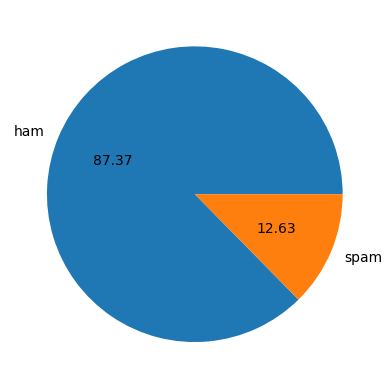

In [52]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

__Here the Data is not balanced, as we can see that 87.37% of data is only 'ham'.__

In [53]:
#So to deal with it, we use nltk(Natural language tool kit) library.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gsaim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
#Adding a column with no of characters.
df['num_chars'] = df['text'].apply(len)
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [55]:
#Adding a column with no of words.
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [56]:
#Adding a column with no of sentences.
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


__Simple Statistical Analysis__

In [57]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
#targeting 'ham'.
df[df['target'] == 0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
#targeting 'spam'.
df[df['target'] == 1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


__Data Visualization__

In [60]:
# #Interactive plot using graph_objects from plotly library.

# fig = go.Figure()
# fig.add_trace(go.Histogram(x = df[df['target'] == 0]['num_chars'], name = 'ham Distribution'))
# fig.add_trace(go.Histogram(x = df[df['target'] == 1]['num_chars'], name = 'spam Distribution'))

# #The two histograms are drawn on the top of another.
# fig.update_layout(xaxis_title = 'num_chars',
#                 yaxis_title = 'Count',
#                  title = 'Histogram Plot',
#                  width = 800,
#                  height = 600)

# fig.show()

In [61]:
# fig = go.Figure()
# fig.add_trace(go.Histogram(x = df[df['target'] == 0]['num_words'], name = 'ham Distribution'))
# fig.add_trace(go.Histogram(x = df[df['target'] == 1]['num_words'], name = 'spam Distribution'))

# #The two histograms are drawn on the top of another.
# fig.update_layout(xaxis_title = 'num_words',
#                 yaxis_title = 'Count',
#                  title = 'Histogram Plot',
#                  width = 800,
#                  height = 600)

# fig.show()

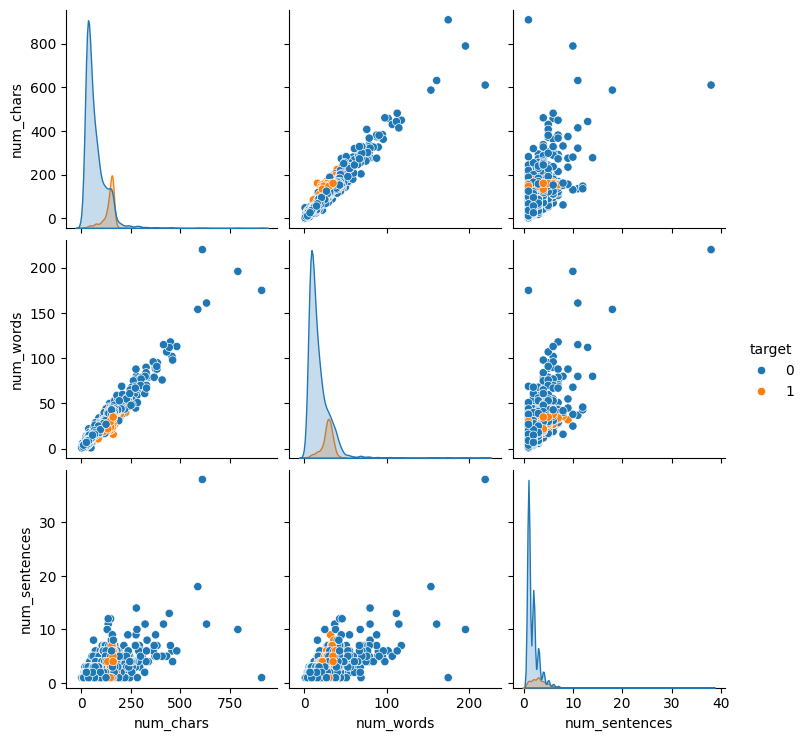

In [62]:
sns.pairplot(df,hue = 'target')
plt.show()

In [63]:
# #Correlation representation using Heatmap
# corr_matrix = df.corr().round(2)

# print(corr_matrix['target'].sort_values(ascending = False))

# heat_map_fig = px.imshow(corr_matrix, template = "seaborn", text_auto = True)

# heat_map_fig.update_layout(
#                             xaxis_rangeslider_visible = False,
#                             autosize = False,
#                             width = 700,
#                             height = 500,
#                             title = {'text' : "Correlation of Numerical Variables"})

# heat_map_fig.show()

__Data Preprocessing__

-Lower case.

-Tokenization.

-Removing special characters.

-Removing stop words and punctuations.

-Stemming(It is used to reduce an inflected word down to its word stem.)


In [64]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gsaim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
ps = PorterStemmer()

def transform_text(text):
    
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk this stuff anymore tonight, k? I'am already crying")

print(transformed_text)

gon na home soon want talk stuff anymor tonight k alreadi cri


In [66]:
df['transformed_txt'] = df['text'].apply(transform_text)
df.head(5)

,target,text,num_chars,num_words,num_sentences,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
#Generating word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10,background_color = 'white')

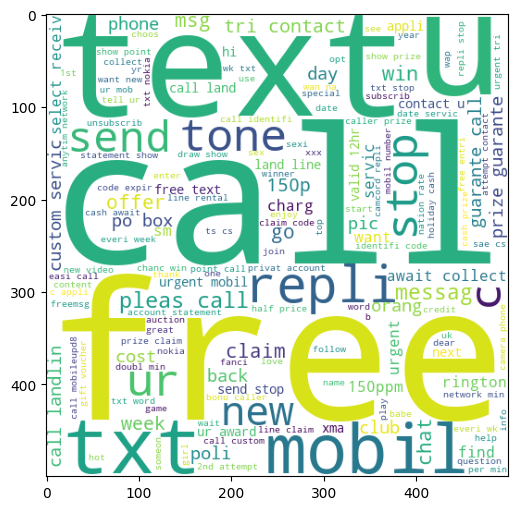

In [68]:
#Displaying the spam word cloud.
spam_wc = wc.generate(df[df['target'] == 1]['transformed_txt'].str.cat(sep=" "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

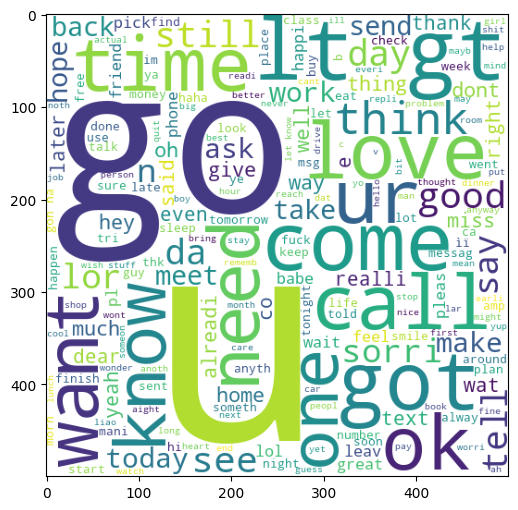

In [69]:
#Displaying the ham word cloud.
ham_wc = wc.generate(df[df['target'] == 0]['transformed_txt'].str.cat(sep=" "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [70]:
#Creating a list of occuring words in 'spam' mails.
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_txt'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
        
len(spam_corpus)        

9939

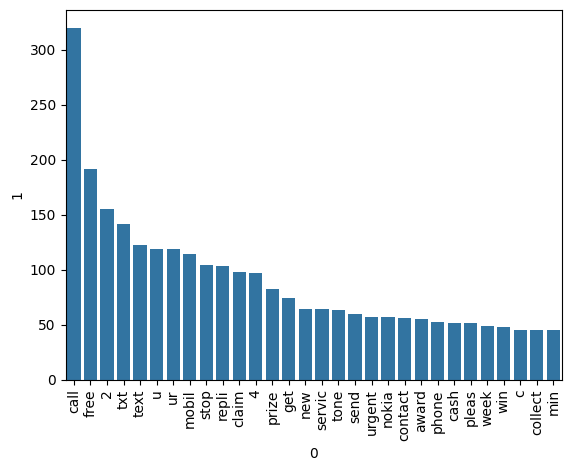

In [71]:
#PLotting graph for common words occuring in the list - spam_corpus.
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [72]:
#creating a list of occuring words in 'ham' mails.
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_txt'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
len(ham_corpus)        

35404

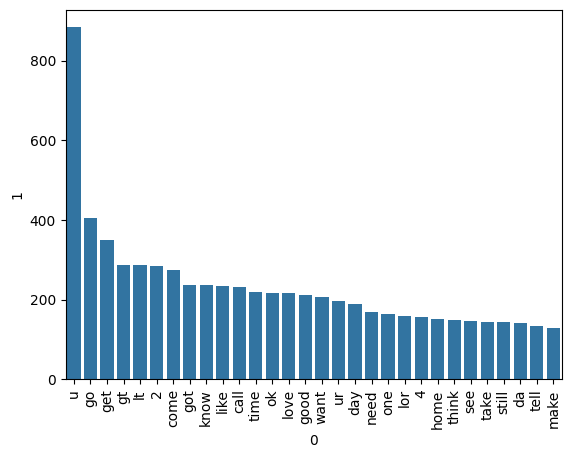

In [73]:
#Plotting graph for common words occuring in the list - ham_corpus.
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [74]:
df
#df.to_csv('Updated_file.csv', index=False)

,target,text,num_chars,num_words,num_sentences,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


__Model Building__

In [75]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [76]:
x = df['transformed_txt']
y = df['target']

In [77]:
x

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_txt, Length: 5169, dtype: object

In [78]:
x.shape

(5169,)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [80]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [81]:
nb_model = MultinomialNB()
nb_model.fit(x_train_vec,y_train)
predictions = nb_model.predict(x_test_vec)

In [82]:
#gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [83]:
mnb.fit(x_train_vec,y_train)
y_pred2 = mnb.predict(x_test_vec)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9796905222437138
[[882   7]
 [ 14 131]]
0.9492753623188406


In [84]:
bnb.fit(x_train_vec,y_train)
y_pred3 = bnb.predict(x_test_vec)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.965183752417795
[[887   2]
 [ 34 111]]
0.9823008849557522


In [85]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bc = BaggingClassifier(n_estimators = 50,random_state =2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state=2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BGC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [87]:
def train_classifier(clfs,x_train_vec,y_train,x_test_vec,y_test):
    clfs.fit(x_train_vec,y_train)
    y_pred = clfs.predict(x_test_vec)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [88]:
train_classifier(svc,x_train_vec,y_train,x_test_vec,y_test)

(0.9323017408123792, 0.7737226277372263)

In [89]:
train_classifier(mnb,x_train_vec,y_train,x_test_vec,y_test)

(0.9796905222437138, 0.9492753623188406)

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train_vec,y_train,x_test_vec,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precsion - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9323017408123792
Precsion -  0.7737226277372263
For  KN
Accuracy -  0.9052224371373307
Precsion -  1.0
For  NB
Accuracy -  0.9796905222437138
Precsion -  0.9492753623188406
For  DT
Accuracy -  0.9235976789168279
Precsion -  0.9342105263157895
For  RF
Accuracy -  0.965183752417795
Precsion -  0.990990990990991


c:\Users\gsaim\OneDrive\Desktop\Spam-Email-Classification-main\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



For  AdaBoost
Accuracy -  0.9458413926499033
Precsion -  0.8396946564885496
For  BGC
Accuracy -  0.9555125725338491
Precsion -  0.889763779527559
For  ETC
Accuracy -  0.9758220502901354
Precsion -  0.9918032786885246
For  GBDT
Accuracy -  0.9332688588007737
Precsion -  0.88
For  xgb
Accuracy -  0.9661508704061895
Precsion -  0.9166666666666666


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
7,ETC,0.975822,0.991803
4,RF,0.965184,0.990991
2,NB,0.979691,0.949275
3,DT,0.923598,0.934211
9,xgb,0.966151,0.916667
6,BGC,0.955513,0.889764
8,GBDT,0.933269,0.880000
5,AdaBoost,0.945841,0.839695
0,SVC,0.932302,0.773723


In [92]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,ETC,Accuracy,0.975822
2,RF,Accuracy,0.965184
3,NB,Accuracy,0.979691
4,DT,Accuracy,0.923598
5,xgb,Accuracy,0.966151
6,BGC,Accuracy,0.955513
7,GBDT,Accuracy,0.933269
8,AdaBoost,Accuracy,0.945841
9,SVC,Accuracy,0.932302


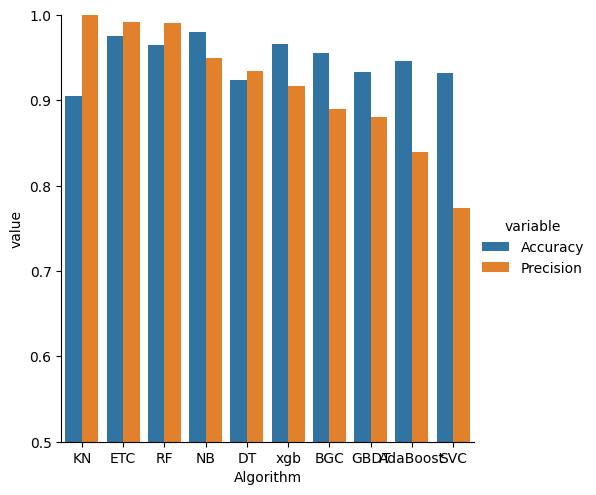

In [93]:
sns.catplot(x = 'Algorithm', y = 'value',hue = 'variable',data = performance_df1,kind = 'bar',height = 5)
plt.ylim(0.5,1.0)
plt.show()

__Model Tuning__

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending = False)

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending = False)

In [96]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')

In [97]:
new_df_scaled = new_df.merge(temp_df,on = 'Algorithm')

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending = False)

In [99]:
new_df_scaled.merge(temp_df,on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,ETC,0.975822,0.991803,0.975822,0.991803,0.975822,0.991803,0.975822,0.991803
2,RF,0.965184,0.990991,0.965184,0.990991,0.965184,0.990991,0.965184,0.990991
3,NB,0.979691,0.949275,0.979691,0.949275,0.979691,0.949275,0.979691,0.949275
4,DT,0.923598,0.934211,0.923598,0.934211,0.923598,0.934211,0.923598,0.934211
5,xgb,0.966151,0.916667,0.966151,0.916667,0.966151,0.916667,0.966151,0.916667
6,BGC,0.955513,0.889764,0.955513,0.889764,0.955513,0.889764,0.955513,0.889764
7,GBDT,0.933269,0.880000,0.933269,0.880000,0.933269,0.880000,0.933269,0.880000
8,AdaBoost,0.945841,0.839695,0.945841,0.839695,0.945841,0.839695,0.945841,0.839695
9,SVC,0.932302,0.773723,0.932302,0.773723,0.932302,0.773723,0.932302,0.773723


In [100]:
#Voting Classifier
svc = SVC(kernel = 'sigmoid',gamma = 1.0,probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50,random_state =2)

voting = VotingClassifier(estimators = [('svm',svc),('nb',mnb),('et',etc)],voting = 'soft')

In [101]:
voting.fit(x_train_vec,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:
y_pred = voting.predict(x_test_vec)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 1.0


In [103]:
#Applying stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimators = RandomForestClassifier()

In [104]:
from sklearn.ensemble import StackingClassifier

In [105]:
clf = StackingClassifier(estimators = estimators,final_estimator = final_estimators)

In [106]:
clf.fit(x_train_vec,y_train)
y_pred = clf.predict(x_test_vec)
print("Accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
precision 0.9923664122137404


In [107]:
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(nb_model,open('model.pkl','wb'))

In [108]:
#sample input
sample_input = ['Enjoy 10% off text "CUPCAKE" to unlock instant discounts.']
sample_input_vec = vectorizer.transform(sample_input)
sample_prediction = nb_model.predict(sample_input_vec)
print(sample_prediction)

[1]


In [109]:
if sample_prediction[0] == 0:
    print("HAM")
else:
    print("SPAM")

SPAM
